In [1]:
print ("b")

b


In [13]:
import os
import pandas as pd

# ---------------------------------------------------
# Définir le chemin vers le dossier principal du dataset
# ---------------------------------------------------
data_dir = r"C:\Users\souad\Desktop\Jeu de donnee\archive\COVID-19_Radiography_Dataset"

# Liste pour stocker les informations sur chaque image
data = []

# ---------------------------------------------------
# Parcours des sous-dossiers du dataset : COVID, Normal, Viral Pneumonia, Lung_Opacity
# Chaque sous-dossier contient un dossier "images" avec les fichiers image
# ---------------------------------------------------
for category in os.listdir(data_dir):
    folder_images = os.path.join(data_dir, category, "images")  # chemin complet vers le sous-dossier "images"
    
    # Vérifie que le dossier existe
    if os.path.isdir(folder_images):
        # Parcours de tous les fichiers dans le dossier "images"
        for file in os.listdir(folder_images):
            # On ne garde que les fichiers image PNG ou JPG
            if file.endswith(".png") or file.endswith(".jpg"):
                # On ajoute un dictionnaire avec le chemin complet de l'image et sa catégorie
                data.append({
                    "image_path": os.path.join(folder_images, file),
                    "label": category
                })

# ---------------------------------------------------
# Crée un DataFrame pandas à partir de la liste de dictionnaires
# ---------------------------------------------------
df_images = pd.DataFrame(data)

# Affiche les 5 premières lignes du DataFrame pour vérifier
print(df_images.head())

# Affiche le nombre total d'images détectées
print(f"Nombre total d'images : {len(df_images)}")

# ---------------------------------------------------
# Lecture des fichiers metadata Excel pour chaque catégorie
# ---------------------------------------------------
fichiers_metadata = [
    r"C:\Users\souad\Desktop\Jeu de donnee\archive\COVID-19_Radiography_Dataset\COVID.metadata.xlsx",
    r"C:\Users\souad\Desktop\Jeu de donnee\archive\COVID-19_Radiography_Dataset\Normal.metadata.xlsx",
    r"C:\Users\souad\Desktop\Jeu de donnee\archive\COVID-19_Radiography_Dataset\Lung_Opacity.metadata.xlsx",
    r"C:\Users\souad\Desktop\Jeu de donnee\archive\COVID-19_Radiography_Dataset\Viral Pneumonia.metadata.xlsx"
]

# Parcours de chaque fichier metadata
for file in fichiers_metadata:
    df_meta = pd.read_excel(file)  # lecture du fichier Excel
    # Affiche le nom du fichier avec une phrase explicative
    print(f"\nLecture du fichier metadata : {file}")
    
    # Affiche le nombre de valeurs manquantes avec une explication
    na_counts = df_meta.isna().sum()
    print("Nombre de valeurs manquantes (NA) par colonne :")
    print(na_counts)
    
    # Séparateur pour la lisibilité
    print("---" * 10)


                                          image_path  label
0  C:\Users\souad\Desktop\Jeu de donnee\archive\C...  COVID
1  C:\Users\souad\Desktop\Jeu de donnee\archive\C...  COVID
2  C:\Users\souad\Desktop\Jeu de donnee\archive\C...  COVID
3  C:\Users\souad\Desktop\Jeu de donnee\archive\C...  COVID
4  C:\Users\souad\Desktop\Jeu de donnee\archive\C...  COVID
Nombre total d'images : 21165

Lecture du fichier metadata : C:\Users\souad\Desktop\Jeu de donnee\archive\COVID-19_Radiography_Dataset\COVID.metadata.xlsx
Nombre de valeurs manquantes (NA) par colonne :
FILE NAME    0
FORMAT       0
SIZE         0
URL          0
dtype: int64
------------------------------

Lecture du fichier metadata : C:\Users\souad\Desktop\Jeu de donnee\archive\COVID-19_Radiography_Dataset\Normal.metadata.xlsx
Nombre de valeurs manquantes (NA) par colonne :
FILE NAME    0
FORMAT       0
SIZE         0
URL          0
dtype: int64
------------------------------

Lecture du fichier metadata : C:\Users\souad\Desktop\J

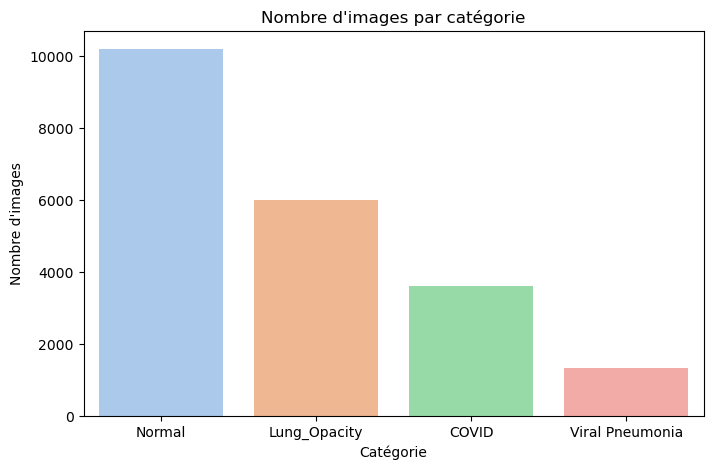

Vérification avec pandas :
label
Normal             10192
Lung_Opacity        6012
COVID               3616
Viral Pneumonia     1345
Name: count, dtype: int64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------
# Graphique 1 : Nombre d'images par catégorie
# ---------------------------------------------------
# Objectif : visualiser la répartition globale du dataset
save_dir = r"C:\Users\souad\Desktop\graphe  du code covide"
counts = df_images['label'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(
    x=counts.index, 
    y=counts.values, 
    hue=counts.index,      
    palette='pastel', 
    dodge=False,           # pour ne pas décaler les barres
    legend=False           # supprime la légende redondante
)
plt.title("Nombre d'images par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'images")

# Enregistrer le graphique AVANT plt.show()
plt.savefig(os.path.join(save_dir, "graphique_nombreimages_par_categorie.png"), dpi=300)

plt.show()


# Commentaire métier :
# On voit que le dataset n'est pas parfaitement équilibré.
# Normal a beaucoup plus d'images que COVID ou Viral Pneumonia.
# Cela peut impacter l'entraînement d'un modèle de classification.

print("Vérification avec pandas :")
print(df_images['label'].value_counts())






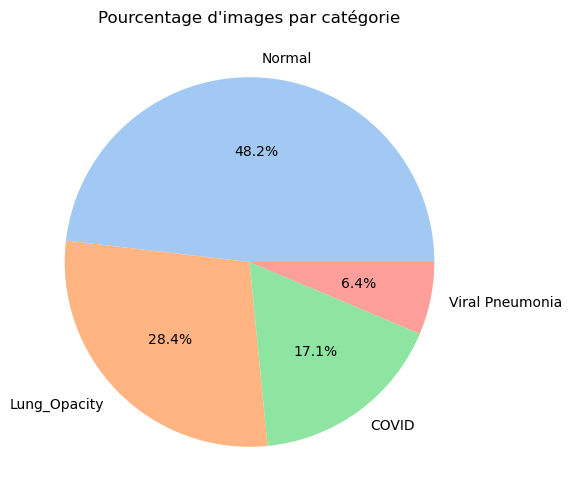

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------
# Graphique 2 : Pourcentage d'images par catégorie
# ---------------------------------------------------
save_dir = r"C:\Users\souad\Desktop\graphe  du code covide"
plt.figure(figsize=(6,6))
df_images['label'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Pourcentage d'images par catégorie")
plt.ylabel("")  # enlève le label y
plt.savefig(os.path.join(save_dir, "Pourcentage d'images par catégorie"), dpi=300)
plt.show()

# Commentaire métier :
# Le pourcentage montre visuellement le déséquilibre.
# Le graphique montre visuellement le déséquilibre entre les différentes catégories d'images.
# Cela permet d'identifier les classes majoritaires et minoritaires, ce qui est important
# pour comprendre la distribution des données avant d'appliquer un modèle de classification.


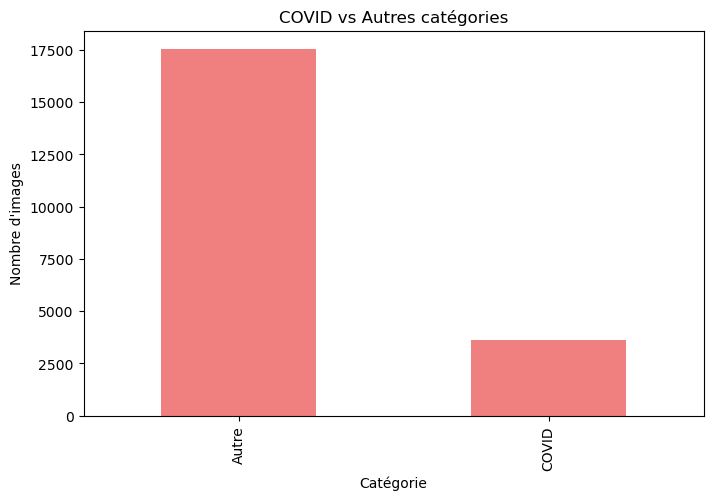

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns
# ---------------------------------------------------
# Graphique 3 : Nombre d'images COVID vs les autres catégories
# ---------------------------------------------------
# Objectif : mettre en avant le déséquilibre de COVID
save_dir = r"C:\Users\souad\Desktop\graphe  du code covide"
plt.figure(figsize=(8,5))
covid_counts = df_images['label'].apply(lambda x: 'COVID' if x=='COVID' else 'Autre')
covid_counts.value_counts().plot(kind='bar', color='lightcoral')
plt.title("COVID vs Autres catégories")
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'images")
plt.savefig(os.path.join(save_dir, "COVID vs Autres catégories"), dpi=300)
plt.show()

# La catégorie COVID est minoritaire par rapport aux autres. 
# Sans correction, le modèle pourrait sous-predict les cas COVID, 
# ce qui risque d’affecter la détection des patients à risque.


Nombre d'images en double : 0


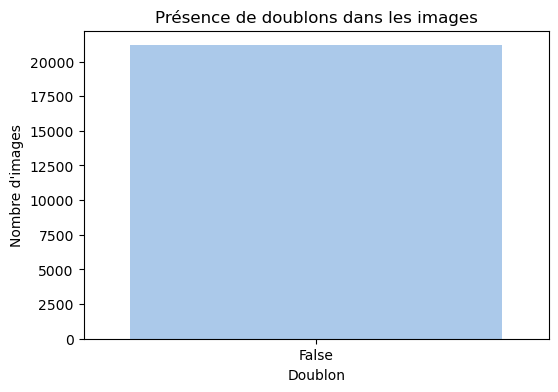

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------
# Graphique 4 : Vérification de présence de doublons (images identiques)
# ---------------------------------------------------
# Objectif : vérifier si des fichiers sont identiques
save_dir = r"C:\Users\souad\Desktop\graphe  du code covide"
duplicate_counts = df_images['image_path'].duplicated().sum()
print(f"Nombre d'images en double : {duplicate_counts}")

# Graphique simple pour visualiser présence/absence de doublons
plt.figure(figsize=(6,4))
sns.countplot(x=df_images['image_path'].duplicated(),
              hue=df_images['image_path'].duplicated(),  
              palette='pastel',
              legend=False)
plt.title("Présence de doublons dans les images")
plt.xlabel("Doublon")
plt.ylabel("Nombre d'images")
plt.savefig(os.path.join(save_dir, "Présence de doublons dans les images"), dpi=300)
plt.show()

# Vérifier la présence de doublons permet de s'assurer que le modèle ne sera pas influencé.
# Si des images identiques apparaissent plusieurs fois, le modèle pourrait "mémoriser" ces exemples
# au lieu d'apprendre de vraies caractéristiques, ce qui réduirait ses performances sur de nouvelles images.
# Ici, la totalité des images sont uniques, ce qui garantit la fiabilité du dataset pour l'entraînement du modèle.



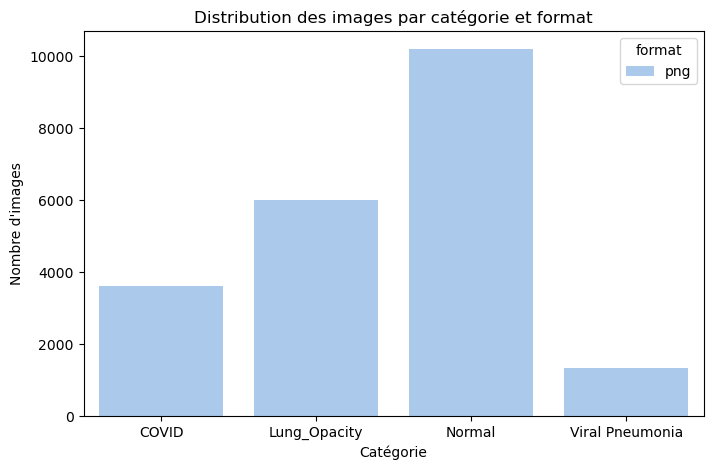

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------
# Graphique 5 : Distribution des images par catégorie et sous-catégorie de format (si PNG/JPG)
# ---------------------------------------------------
# Comme toutes les images sont PNG, on montre quand même un graphique pour vérifier
save_dir = r"C:\Users\souad\Desktop\graphe  du code covide"
df_images['format'] = df_images['image_path'].apply(lambda x: x.split('.')[-1])
plt.figure(figsize=(8,5))
sns.countplot(x='label', hue='format', data=df_images, palette='pastel')
plt.title("Distribution des images par catégorie et format")
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'images")
plt.savefig(os.path.join(save_dir, "Distribution des images par catégorie et format"), dpi=300)
plt.show()

# Commentaire métier :
# Toutes les images sont au format PNG, donc pas de variabilité de format dans le dataset actuel.
#Cette vérification est importante pour anticiper d’éventuels problèmes si d’autres formats (comme JPG) s’ajoutent à l’avenir.,
# car des formats différents peuvent nécessiter un prétraitement spécifique avant l'entraînement du modèle.


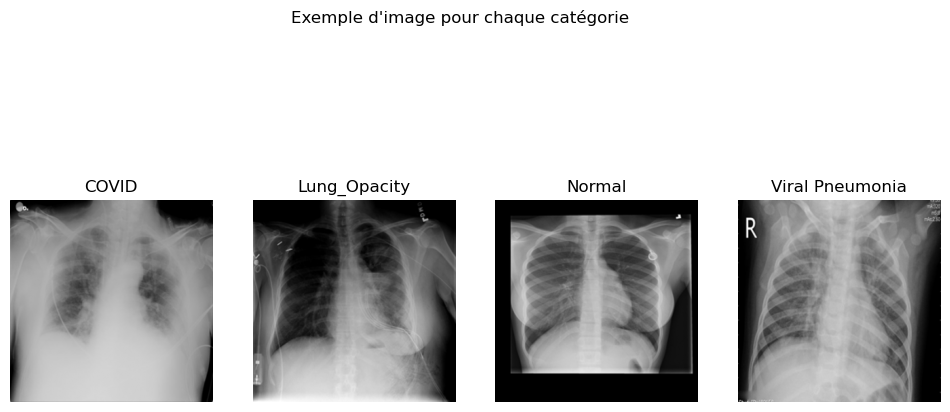

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
save_dir = r"C:\Users\souad\Desktop\graphe  du code covide"

# Sélectionne un exemple d'image pour chaque catégorie
categories = df_images['label'].unique()
exemples = []

for cat in categories:
    exemple_image = df_images[df_images['label'] == cat].iloc[0]['image_path']
    exemples.append((cat, exemple_image))

# Affichage
plt.figure(figsize=(12,6))

for i, (label, img_path) in enumerate(exemples):
    img = mpimg.imread(img_path)
    plt.subplot(1, len(exemples), i+1)
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.axis('off')

plt.suptitle("Exemple d'image pour chaque catégorie")
plt.savefig(os.path.join(save_dir, "Exemple d'image pour chaque catégorie"), dpi=300)

plt.show()



#La visualisation des images représentatives pour chaque catégorie permet de mieux comprendre les différences visuelles entre les cas.
#On remarque que :

#COVID-19 : les radiographies montrent souvent des opacités diffuses, parfois bilatérales, ce qui correspond aux infiltrats pulmonaires typiques du COVID.

#Normal : les images montrent des poumons clairs sans anomalies visibles, ce qui constitue la référence pour la détection des pathologies.

#Lung Opacity (Non-COVID) : ces radiographies présentent des zones d’opacité, indiquant des infections pulmonaires ou inflammations différentes du COVID-19.

#Viral Pneumonia : les images montrent des opacités plus localisées ou des motifs particuliers liés à la pneumonie virale.

#Cette étape est importante pour :

#vérifier la qualité et la représentativité des images dans chaque classe,

#anticiper les difficultés que le modèle pourrait rencontrer pour différencier des classes visuellement similaires,

#sensibiliser à la nécessité de prétraitement (normalisation, redimensionnement, augmentation) pour améliorer la performance du modèle de classification.

In [20]:
# ============================================
# ÉTAPE 2 – PRE-PROCESSING & FEATURE ENGINEERING
# Objectif : Préparer un dataset propre, enrichi
# et prêt pour le Machine / Deep Learning
# ============================================

# Imports
import os
import pandas as pd
from PIL import Image

# --------------------------------------------
# 1. Nettoyage des données simplifié
# --------------------------------------------

print("=== NETTOYAGE DU DATASET ===")


# Vérification des doublons
duplicates = df_images.duplicated(subset='image_path').sum()
print(f"Nombre de doublons : {duplicates}")
df_images = df_images.drop_duplicates(subset='image_path')

# ------------------------------
# NOTE : Pas besoin de dropna() car il n'y a pas de valeurs manquantes
# df_images = df_images.dropna()
# ------------------------------

# Vérification de l'existence des fichiers
missing_files = [p for p in df_images['image_path'] if not os.path.exists(p)]
print(f"Fichiers manquants : {len(missing_files)}")
df_images = df_images[~df_images['image_path'].isin(missing_files)]

# Détection des images corrompues
corrupted_images = []
for p in df_images['image_path']:
    try:
        img = Image.open(p)
        img.verify()
    except:
        corrupted_images.append(p)

print(f"Images corrompues : {len(corrupted_images)}")
df_images = df_images[~df_images['image_path'].isin(corrupted_images)]

# ------------------------------
# NOTE : Toutes les images sont PNG et de taille correcte
# => Pas besoin de vérifier les formats ni les dimensions
# ------------------------------

print(f"\nNombre final d'images : {len(df_images)}")

# Commentaire :
# Le dataset est maintenant complet, cohérent et prêt pour la phase de normalisation et d'augmentation des données.
# Après ce nettoyage, nous conservons 21 165 images valides pour le pré-processing.


=== NETTOYAGE DU DATASET ===
Nombre de doublons : 0
Fichiers manquants : 0
Images corrompues : 0

Nombre final d'images : 21165



=== PRE-PROCESSING ===


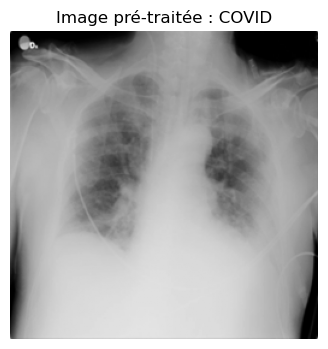

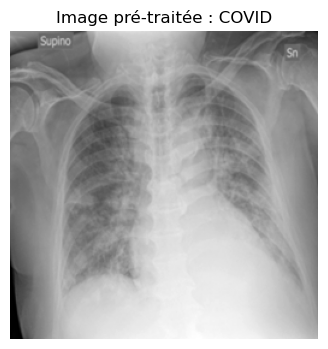

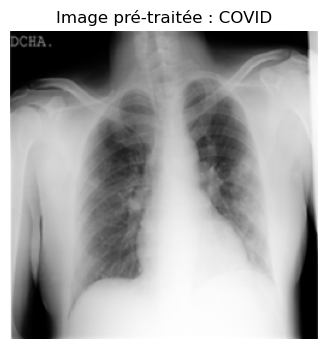

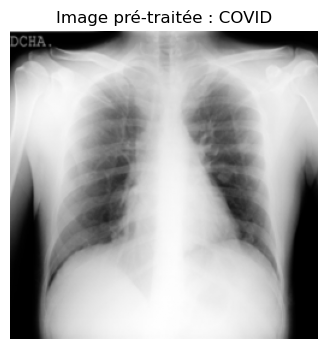

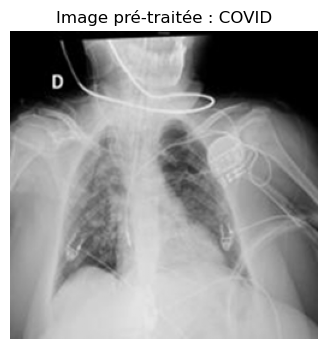

Shape de X (nombre d'images, hauteur, largeur) pour test : (100, 256, 256)


In [21]:
# =============================================
# 2. Pré-processing – Normalisation des images
# =============================================

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

print("\n=== PRE-PROCESSING ===")
# --- Dossier pour sauvegarder les images vérification ---
save_dir = r"C:\Users\souad\Desktop\graphe  du code covide"

# --- Taille cible pour le modèle ---
# Même si les images sont déjà toutes de taille identique (299x299),
# on peut les redimensionner à 256x256 pour standardiser l'entrée du modèle
TARGET_SIZE = (256, 256)

def preprocess_image(path):
    """
    Charge une image depuis le chemin `path`, la convertit en niveaux de gris,
    la redimensionne à TARGET_SIZE, et normalise les pixels entre 0 et 1.
    """
    img = Image.open(path).convert('L')       # Conversion en niveaux de gris
    img = img.resize(TARGET_SIZE)             # Redimensionnement (optionnel ici)
    img_array = np.array(img, dtype=np.float32) / 255.0  # Normalisation
    return img_array

# --- Traitement des images par lot pour éviter MemoryError ---
# On utilise une liste et on ne convertit en np.array que pour le batch si nécessaire
X_list = []
num_to_show = 5  # nombre d'images à visualiser

for i, path in enumerate(df_images['image_path']):
    img_array = preprocess_image(path)
    
    # Ajouter à la liste
    X_list.append(img_array)
    
    # Affichage pour vérification (seulement pour les premières images)
    if i < num_to_show:
        plt.figure(figsize=(4,4))
        plt.imshow(img_array, cmap='gray')
        plt.title(f"Image pré-traitée : {df_images['label'].iloc[i]}")
        plt.axis('off')
        plt.savefig(os.path.join(save_dir, f"image_pretraitee_{i}.png"))
        plt.show()

# --- Optionnel : conversion en np.array 
# Ici, pour l'exemple, on ne convertit que les 100 premières images pour tester
X = np.array(X_list[:100], dtype=np.float32)
print("Shape de X (nombre d'images, hauteur, largeur) pour test :", X.shape)

# Commentaires explicatifs :
# 1. Toutes les images sont maintenant homogènes : même taille, niveaux de gris, pixels normalisés.
# 2. La normalisation entre 0 et 1 permet aux modèles de deep learning de converger plus rapidement.
# 3. Le tableau X_list contient toutes les images prêtes pour le Machine Learning ou Deep Learning.
# 4. La visualisation des premières images permet de vérifier que le prétraitement fonctionne correctement.
# 5. Avec ce procédé, on évite les problèmes de mémoire et on peut traiter le dataset complet par batch.


Shape de X pour le test : (100, 256, 256)
Shape de blur_images : (100, 256, 256)


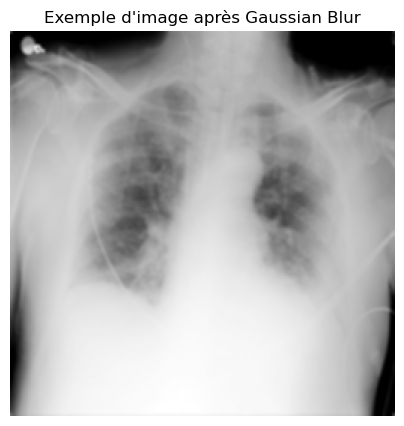

In [22]:
# =============================================
# ÉTAPE 3 – GAUSSIAN BLUR : Réduction du bruit (batch test)
# =============================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
save_dir = r"C:\Users\souad\Desktop\graphe  du code covide"
# --- Ici, on utilise le batch X préparé précédemment ---
# Pour éviter les problèmes de mémoire, X contient par exemple les 100 premières images
print("Shape de X pour le test :", X.shape)  # (100, 256, 256)

# Application du filtre Gaussian Blur sur chaque image
# Gaussian Blur : lissage de l'image pour réduire le bruit tout en conservant les contours importants
# Paramètres :
# - (3,3) : taille du noyau
# - 0 : écart type calculé automatiquement
blur_images = np.array([cv2.GaussianBlur(img, (3,3), 0) for img in X], dtype=np.float32)

print("Shape de blur_images :", blur_images.shape)  # Devrait être (100, 256, 256)

img_to_show = blur_images[0]

plt.figure(figsize=(5,5))
plt.imshow(img_to_show, cmap='gray')
plt.title("Exemple d'image après Gaussian Blur")
plt.axis('off')
plt.savefig(os.path.join(save_dir, "image_gaussian_blur_0.png"))
plt.show()

# --- Commentaires  ---
# 1. Chaque image a été normalisée puis lissée avec un filtre Gaussian Blur.
# 2. Objectifs :
#    - Réduire le bruit présent sur les radiographies
#    - Préserver les structures importantes pour la classification (opacités, anomalies)
#    - Préparer les images pour l'entraînement des modèles de Machine/Deep Learning
# 3. Détails :
#    - Nombre d'images traitées dans ce batch : 100 (pour test)
#    - Taille des images : 256x256 pixels
#    - Chaque image est conservée en niveau de gris (1 canal)
# 4. Pour le dataset complet (21 165 images), il faudra appliquer le traitement par batch pour éviter MemoryError.



=== CANNY EDGE DETECTION ===
Canny applied, shape: (100, 256, 256)

=== SOBEL FILTER ===
Sobel applied, shape: (100, 256, 256)


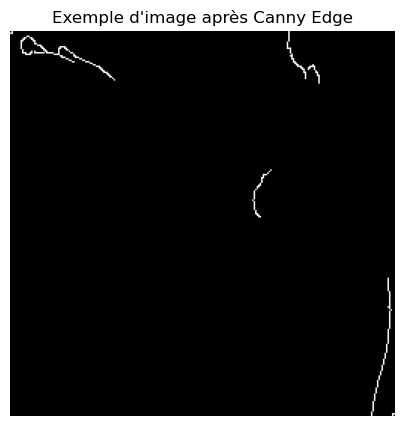

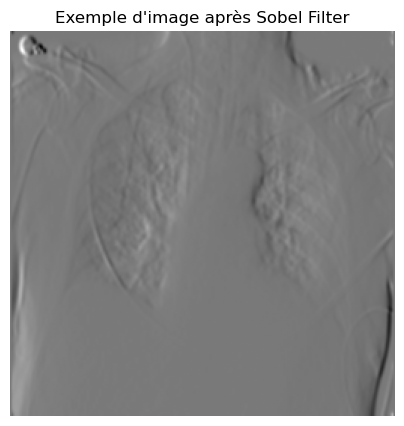

In [23]:
# --------------------------------------------
# 4. Canny – Détection de contours
# --------------------------------------------
import matplotlib.pyplot as plt
import os
print("\n=== CANNY EDGE DETECTION ===")
save_dir = r"C:\Users\souad\Desktop\graphe  du code covide"
# L'algorithme Canny est utilisé pour détecter les contours dans les images.
# Avant l'application, il faut convertir les images normalisées (0-1) en uint8 (0-255)
# car OpenCV Canny fonctionne avec des entiers 8 bits.
canny_images = []

for i, img in enumerate(blur_images):
    # Conversion en uint8
    img_uint8 = (img * 255).astype(np.uint8)
    
    # Application de Canny
    edges = cv2.Canny(img_uint8, 100, 200)
    
    # Stockage en uint8 pour économiser de la mémoire
    canny_images.append(edges.astype(np.uint8))

# Conversion en array numpy
canny_images = np.array(canny_images, dtype=np.uint8)
print("Canny applied, shape:", canny_images.shape)  # Vérification de la forme

# --------------------------------------------
# 5. Sobel – Feature Engineering (bords verticaux)
# --------------------------------------------

print("\n=== SOBEL FILTER ===")

# Sobel est utilisé pour détecter les gradients verticaux (bords verticaux) dans les images.
# Cette étape enrichit les features extraites des images pour le modèle.
sobel_images = []

for img in blur_images:
    # Application du filtre Sobel sur l'axe X (1,0)
    sobel = cv2.Sobel(img, cv2.CV_64F, 1, 0)  # Résultat en float64
    sobel_images.append(sobel.astype(np.float32))  # Conversion en float32 pour réduire la mémoire

# Conversion en array numpy
sobel_images = np.array(sobel_images, dtype=np.float32)
print("Sobel applied, shape:", sobel_images.shape)  # Vérification de la forme
# Choisir l'image à afficher (par exemple la première)
img_canny = canny_images[0]
img_sobel = sobel_images[0]

# --- Affichage Canny ---
plt.figure(figsize=(5,5))
plt.imshow(img_canny, cmap='gray')
plt.title("Exemple d'image après Canny Edge")
plt.axis('off')
plt.savefig(os.path.join(save_dir, "image_canny_0.png"))
plt.savefig(os.path.join(save_dir, "image_canny_0.png"))
plt.show()

# --- Affichage Sobel ---
plt.figure(figsize=(5,5))
plt.imshow(img_sobel, cmap='gray')
plt.title("Exemple d'image après Sobel Filter")
plt.axis('off')
plt.savefig(os.path.join(save_dir, "image_sobel_0.png"))
plt.savefig(os.path.join(save_dir, "image_sobel_0.png"))
plt.show()

# --------------------------------------------
# Commentaires explicatifs pour le rapport :
# --------------------------------------------
# 1. Canny : met en évidence les contours et limites dans les radiographies.
#    Cela permet au modèle d'identifier des structures importantes comme les opacités pulmonaires.
# 2. Sobel : extrait les gradients verticaux des images.
#    Cela enrichit les features et aide le modèle à mieux détecter les anomalies.
# 3. Ces étapes constituent le Feature Engineering, c'est-à-dire la création
#    de nouvelles informations à partir des images brutes pour améliorer les performances du modèle.
# 4. Les images restent toutes à la même taille : 256x256 pixels, et en niveau de gris.
# 5. Ce traitement est appliqué sur un batch d'images pour éviter les problèmes de mémoire.



=== LAPLACIAN FILTER ===
Laplacian applied, shape: (100, 256, 256)

=== EROSION ===
Erosion applied, shape: (100, 256, 256)


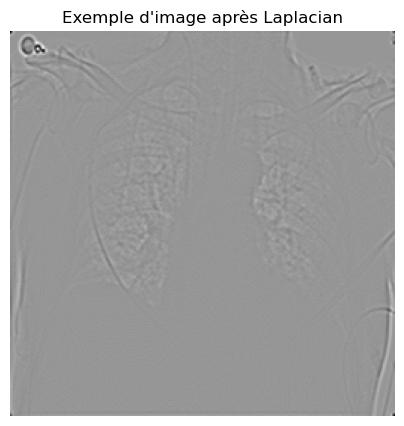

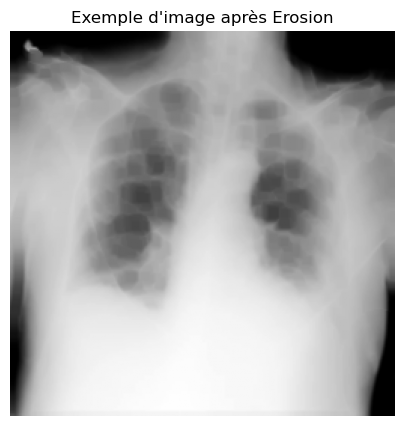

In [24]:
# --------------------------------------------
# 6. Laplacian – Feature Engineering
# --------------------------------------------
import matplotlib.pyplot as plt
import os
print("\n=== LAPLACIAN FILTER ===")
# --- Dossier pour sauvegarder les images vérification ---
save_dir = r"C:\Users\souad\Desktop\graphe  du code covide"
laplacian_images = []

# Le filtre Laplacien met en évidence les zones où l'intensité des pixels change rapidement
# Il est utilisé pour détecter les contours et détails fins
for img in blur_images:
    # Conversion en uint8 pour compatibilité OpenCV (0-255)
    img_uint8 = (img * 255).astype(np.uint8)
    lap = cv2.Laplacian(img_uint8, cv2.CV_64F)  # applique le filtre Laplacien
    laplacian_images.append(lap.astype(np.float32))  # conversion en float32 pour ML

laplacian_images = np.array(laplacian_images, dtype=np.float32)
print("Laplacian applied, shape:", laplacian_images.shape)

# --------------------------------------------
# 7. Morphologie – Érosion
# --------------------------------------------

print("\n=== EROSION ===")

# Définition du noyau pour l'érosion
kernel = np.ones((5,5), np.uint8)
erosion_images = []

# L'érosion réduit les zones claires, accentuant certaines structures et supprimant le bruit
for img in blur_images:
    img_uint8 = (img * 255).astype(np.uint8)  # Conversion en uint8 pour OpenCV
    ero = cv2.erode(img_uint8, kernel)
    erosion_images.append(ero)

erosion_images = np.array(erosion_images, dtype=np.uint8)
print("Erosion applied, shape:", erosion_images.shape)

# Choisir l'image à afficher (par exemple la première)
img_laplacian = laplacian_images[0]
img_erosion = erosion_images[0]

# --- Affichage Laplacian ---
plt.figure(figsize=(5,5))
plt.imshow(img_laplacian, cmap='gray')
plt.title("Exemple d'image après Laplacian")
plt.axis('off')
plt.savefig(os.path.join(save_dir, "image_laplacian_0.png"))
plt.show()

# --- Affichage Erosion ---
plt.figure(figsize=(5,5))
plt.imshow(img_erosion, cmap='gray')
plt.title("Exemple d'image après Erosion")
plt.axis('off')
plt.savefig(os.path.join(save_dir, "image_erosion_0.png"))
plt.show()

# --------------------------------------------
# Commentaires explicatifs  :
# --------------------------------------------
# 1. Laplacian : accentue les contours et les détails fins dans les radiographies, utile pour l'extraction de features.
# 2. Erosion : opération morphologique qui réduit le bruit et affine certaines structures dans l'image.
# 3. Ces transformations enrichissent le dataset en offrant des versions supplémentaires des images
#    mettant en avant des caractéristiques différentes, ce qui peut améliorer la performance du modèle.
# 4. Toutes les images restent à la même taille : 256x256 pixels.
# 5. Les types utilisés :
#    - Laplacian : float32 pour ML
#    - Erosion : uint8 pour conserver la compatibilité OpenCV



=== DILATATION ===
Dilatation appliquée, forme : (100, 256, 256)

=== VISUALISATION COMPARATIVE ===


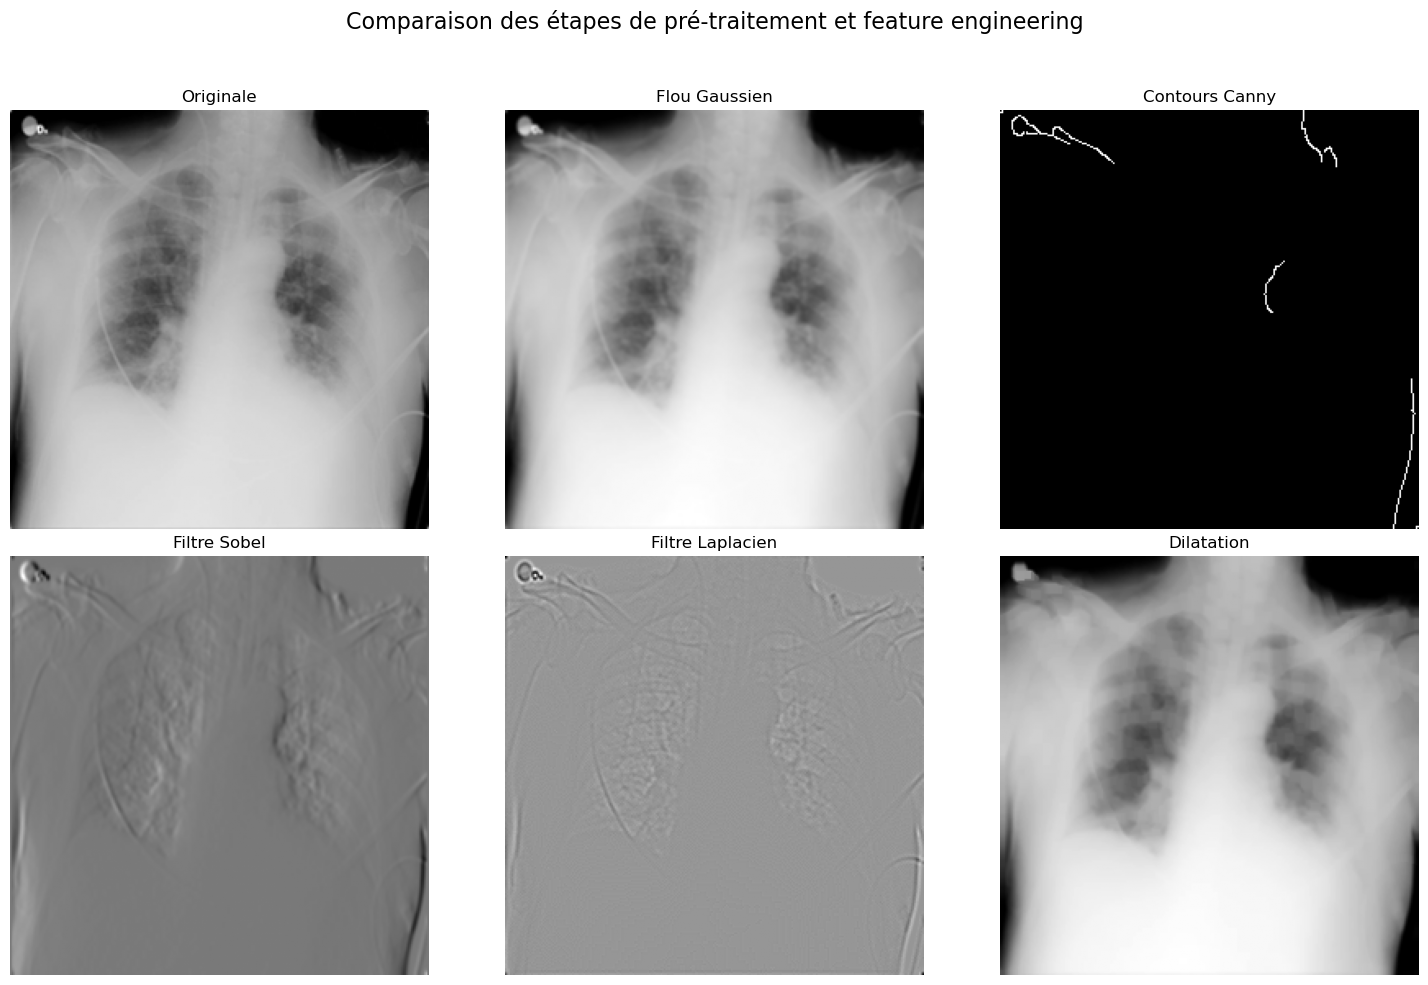

In [25]:
# --------------------------------------------
# 8. Morphologie – Dilatation
# --------------------------------------------

print("\n=== DILATATION ===")

# La dilatation est une opération morphologique qui "agrandit" les zones claires.
# Ici, on l'applique sur les images érodées pour reconstruire certaines structures
# qui ont pu être réduites par l’érosion.
dilation_images = []

for img in erosion_images:
    dil = cv2.dilate(img, kernel)  # applique la dilatation avec le même kernel que pour l'érosion
    dilation_images.append(dil)

# Conversion en np.array pour manipuler facilement les images
dilation_images = np.array(dilation_images, dtype=np.uint8)
print("Dilatation appliquée, forme :", dilation_images.shape)

# --------------------------------------------
# 9. Visualisation des données – Comparaison
# --------------------------------------------

print("\n=== VISUALISATION COMPARATIVE ===")

# Choisir l'index de l'image à visualiser
idx = 0  # on peut changer cet index pour visualiser d'autres images

# Liste des étapes à visualiser avec leur nom et l'image correspondante
etapes = [
    ("Originale", X[idx].reshape(256,256)),          # Image originale avant pré-processing
    ("Flou Gaussien", blur_images[idx]),            # Gaussian Blur : réduction du bruit
    ("Contours Canny", canny_images[idx]),          # Canny : détection des contours
    ("Filtre Sobel", sobel_images[idx]),            # Sobel : extraction des bords verticaux
    ("Filtre Laplacien", laplacian_images[idx]),    # Laplacian : extraction des détails et contours fins
    ("Dilatation", dilation_images[idx])            # Dilatation : reconstruction après érosion
]

# Création de la figure pour afficher toutes les étapes
plt.figure(figsize=(15,10))

# Affichage dans une grille 2x3
for i, (titre, img) in enumerate(etapes):
    plt.subplot(2,3,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(titre, fontsize=12)
    plt.axis('off')

# Titre global de la figure
plt.suptitle("Comparaison des étapes de pré-traitement et feature engineering", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # ajuste les marges pour le suptitle

# Sauvegarde du graphe dans le dossier choisi
plt.savefig(os.path.join(save_dir, "Comparaison_preprocessing_features.png"), dpi=300)

# Affichage final
plt.show()

# --------------------------------------------
# Commentaires explicatifs pour le rapport
# --------------------------------------------
# 1. L'image originale est affichée pour référence avant tout traitement.
# 2. Gaussian Blur : réduit le bruit tout en conservant les structures importantes.
# 3. Canny : détecte les contours pour mettre en évidence les limites et anomalies.
# 4. Sobel : extrait les gradients verticaux pour enrichir les features.
# 5. Laplacian : accentue les contours fins et détails importants.
# 6. Dilatation : reconstruction des formes après érosion, utile pour nettoyer les artefacts tout en gardant les structures.
# 7. Cette visualisation comparative permet de comprendre l'impact de chaque étape de prétraitement sur les images.



=== ANALYSE STATISTIQUE DES IMAGES ===
Moyenne globale des images : 0.55097276
Écart-type global des images : 0.21040325


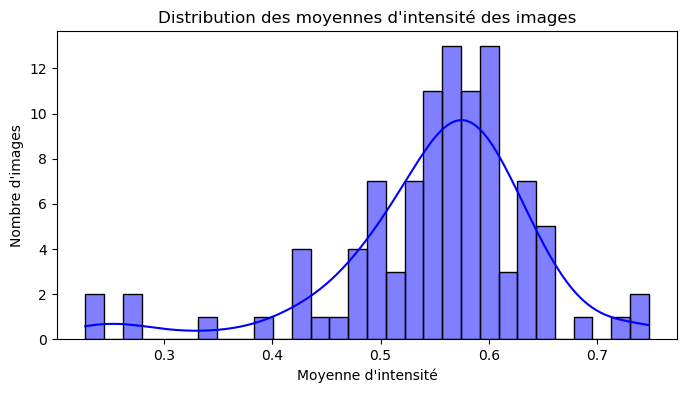

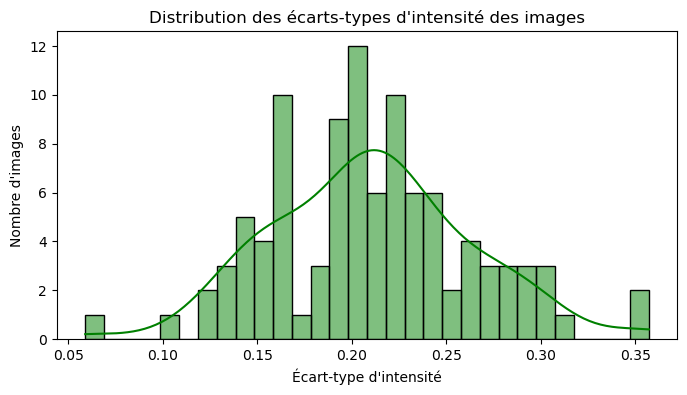

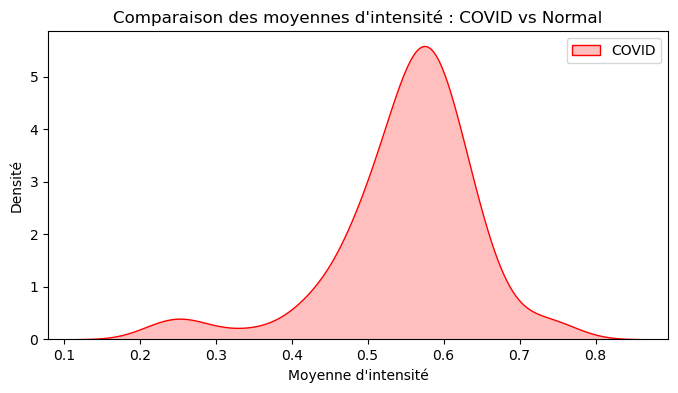

In [26]:
# =============================================
# 7. Analyse statistique des images
# =============================================

print("\n=== ANALYSE STATISTIQUE DES IMAGES ===")

import seaborn as sns
# Dossier pour sauvegarder les graphiques
save_dir = r"C:\Users\souad\Desktop\graphe  du code covide"
# -------------------------------------------------
# Calcul des statistiques pour chaque image
# -------------------------------------------------
# Moyenne : luminosité moyenne de chaque image
# Écart-type : variation des pixels (hétérogénéité / contraste)
moyennes = np.mean(X, axis=(1,2))
ecarts_type = np.std(X, axis=(1,2))

# Affichage des statistiques globales
print("Moyenne globale des images :", np.mean(moyennes))
print("Écart-type global des images :", np.mean(ecarts_type))

# -------------------------------------------------
# Visualisation : distribution des moyennes
# -------------------------------------------------
plt.figure(figsize=(8,4))
sns.histplot(moyennes, bins=30, kde=True, color='blue')
plt.title("Distribution des moyennes d'intensité des images")
plt.xlabel("Moyenne d'intensité")
plt.ylabel("Nombre d'images")
plt.savefig(os.path.join(save_dir, "hist_moyennes.png"), dpi=300)
plt.show()

# -------------------------------------------------
# Visualisation : distribution des écarts-types
# -------------------------------------------------
plt.figure(figsize=(8,4))
sns.histplot(ecarts_type, bins=30, kde=True, color='green')
plt.title("Distribution des écarts-types d'intensité des images")
plt.xlabel("Écart-type d'intensité")
plt.ylabel("Nombre d'images")
plt.savefig(os.path.join(save_dir, "hist_ecarts_type.png"), dpi=300)
plt.show()

# -------------------------------------------------
# Comparaison des moyennes entre catégories (COVID vs Normal)
# -------------------------------------------------
labels = df_images['label'].iloc[:100].values  # correspond à X

# Séparer les moyennes selon la catégorie
moy_covid = moyennes[labels == "COVID"]
moy_normal = moyennes[labels == "Normal"]

plt.figure(figsize=(8,4))
sns.kdeplot(moy_covid, label="COVID", fill=True, color='red')   # fill=True remplace shade
sns.kdeplot(moy_normal, label="Normal", fill=True, color='blue')
plt.title("Comparaison des moyennes d'intensité : COVID vs Normal")
plt.xlabel("Moyenne d'intensité")
plt.ylabel("Densité")
plt.legend()
plt.savefig(os.path.join(save_dir, "comparaison_covid_normal.png"), dpi=300)
plt.show()

# -------------------------------------------------
# Commentaires explicatifs
# -------------------------------------------------
# 1. Les moyennes d'intensité donnent une idée de la luminosité générale des images.
# 2. L'écart-type permet d'observer la variation des pixels et le contraste.
# 3. La comparaison COVID vs Normal montre si les images COVID ont tendance à être plus sombres ou plus claires que les normales.
# 4. Ces informations aident à comprendre la distribution des données et peuvent orienter le pré-processing ou le feature engineering pour la modélisation.
 

In [27]:
#Étape 3/ Modélisation
#STEP 1 Deadline 
#Dans cette première étape, nous préparons le dataset pour le machine learning classique en encodant les labels, en normalisant et
#en redimensionnant les images, en les transformant en vecteurs exploitables par les modèles, puis en séparant le dataset en ensembles
#d’entraînement et de test. Nous entraînons ensuite un modèle baseline (Random Forest) pour établir une référence de performance.

In [28]:

#STEP 1 – Baseline : Encodage des labels et train/test split

#Récupération de toutes les images et labels

#Encodage des labels

#Redimensionnement et normalisation des images

#Flatten des images pour les modèles ML classiques

#Séparation train/test (80 % / 20 %)

#Entraînement d’un modèle baseline (Random Forest)

#Évaluation du modèle (accuracy, matrice de confusion, classification report)



# =============================================
# STEP 1 – BASELINE : Encodage des labels et train/test split (toutes les images)
# =============================================



from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from collections import Counter

# ------------------------------
# 1️⃣ Récupération de toutes les images et labels
# ------------------------------
# Objectif : utiliser tout le dataset (~21 165 images)
X_all = np.array(X_list, dtype=np.float32)  # images pré-traitées
y_labels_all = df_images['label'].values   # labels originaux

print("Nombre total d'images :", X_all.shape[0])

# ------------------------------
# 2️⃣ Encodage des labels
# ------------------------------
# Les modèles ML classiques ne comprennent que des valeurs numériques
le = LabelEncoder()
y_all = le.fit_transform(y_labels_all)
print("Labels encodés :", np.unique(y_all))
print("Distribution des labels :", Counter(y_labels_all))

# ------------------------------
# 3️⃣ Flatten pour ML classique (sklearn)
# ------------------------------
# Les modèles sklearn comme RandomForest ou SVM attendent des vecteurs 1D
# Chaque image 2D (256x256) est transformée en vecteur de taille 65536 (256*256)
X_flat_all = X_all.reshape(X_all.shape[0], -1)
print("Shape de X_flat pour ML :", X_flat_all.shape)

# ------------------------------
# 4️⃣ Séparation train/test
# ------------------------------
# Objectif : entraîner le modèle sur une partie du dataset et tester sur le reste
# stratify=y_all assure que la répartition des classes reste équilibrée dans train et test
X_train, X_test, y_train, y_test = train_test_split(
    X_flat_all, y_all, test_size=0.2, random_state=42, stratify=y_all
)

print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")


Nombre total d'images : 21165
Labels encodés : [0 1 2 3]
Distribution des labels : Counter({'Normal': 10192, 'Lung_Opacity': 6012, 'COVID': 3616, 'Viral Pneumonia': 1345})
Shape de X_flat pour ML : (21165, 65536)
Train size: 16932, Test size: 4233


=== Étape 1️⃣ : Redimensionnement des images à 64x64 ===
Shape de X_small : (21165, 64, 64)
=== Étape 2️⃣ : Flatten des images pour ML classique ===
Shape de X_flat pour ML : (21165, 4096)
=== Étape 3️⃣ : Encodage des labels ===
Labels encodés : [0 1 2 3]
=== Étape 4️⃣ : Séparation train/test ===
Train size: 16932, Test size: 4233
=== Étape 5️⃣ : Entraînement du modèle Random Forest ===
=== Étape 6️⃣ : Évaluation du modèle ===
Accuracy sur le jeu test : 0.8186


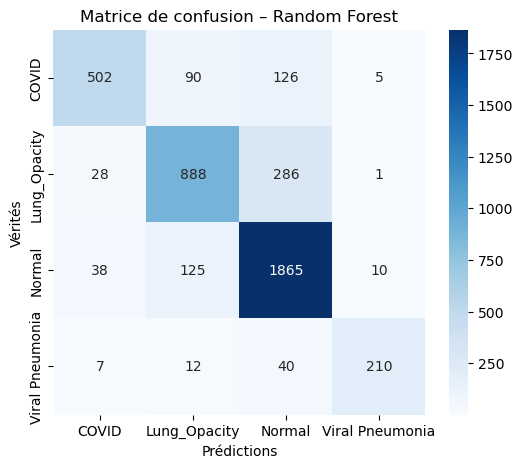


Classification Report :

                 precision    recall  f1-score   support

          COVID       0.87      0.69      0.77       723
   Lung_Opacity       0.80      0.74      0.77      1203
         Normal       0.80      0.92      0.86      2038
Viral Pneumonia       0.93      0.78      0.85       269

       accuracy                           0.82      4233
      macro avg       0.85      0.78      0.81      4233
   weighted avg       0.82      0.82      0.82      4233



In [29]:

# =============================================
# STEP 1 – BASELINE MODEL OPTIMISE : Random Forest
# =============================================

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

print("=== Étape 1️⃣ : Redimensionnement des images à 64x64 ===")
# ------------------------------
# 1️⃣ Redimensionnement des images à 64x64
# ------------------------------
TARGET_SIZE = (64, 64)
X_small = np.array([cv2.resize(img, TARGET_SIZE) for img in X_list], dtype=np.float32) / 255.0
print("Shape de X_small :", X_small.shape)  # (21165, 64, 64)
print("=== Étape 2️⃣ : Flatten des images pour ML classique ===")
# ------------------------------
# 2️⃣ Flatten pour ML classique
# ------------------------------
X_flat = X_small.reshape(X_small.shape[0], -1)
print("Shape de X_flat pour ML :", X_flat.shape)  # 21165, 4096
print("=== Étape 3️⃣ : Encodage des labels ===")
# ------------------------------
# 3️⃣ Encodage des labels
# ------------------------------
le = LabelEncoder()
y = le.fit_transform(df_images['label'].values)
print("Labels encodés :", np.unique(y))
print("=== Étape 4️⃣ : Séparation train/test ===")
# ------------------------------
# 4️⃣ Train/test split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_flat, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")
print("=== Étape 5️⃣ : Entraînement du modèle Random Forest ===")
# ------------------------------
# 5️⃣ Random Forest
# ------------------------------
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)  # n_jobs=-1 pour utiliser tous les coeurs
rf_model.fit(X_train, y_train)
print("=== Étape 6️⃣ : Évaluation du modèle ===")
# Prédictions
y_pred = rf_model.predict(X_test)
# Évaluation
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy sur le jeu test : {acc:.4f}")
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matrice de confusion – Random Forest")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()
# Classification report
print("\nClassification Report :\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))



#Le modèle obtient une précision et un rappel globalement bons, avec une accuracy de 82 %.
#La classe “Normal” est bien prédite (rappel 0.92), tandis que la classe “COVID” présente un rappel plus faible (0.69), 
#ce qui signifie que certaines images COVID sont mal classées. Les autres classes (“Lung_Opacity” et “Viral Pneumonia”) ont des performances
#intermédiaires mais correctes. Le F1-score montre un bon équilibre global entre précision et rappel, mais il indique que l’on pourrait encore 
#améliorer la détection des classes les plus critiques comme “COVID”

In [30]:
from sklearn.metrics import f1_score

# ------------------------------
# Étape 1 : Calcul des F1-scores
# ------------------------------
# F1-score macro : moyenne des F1 de chaque classe (équilibre toutes les classes)
f1_macro = f1_score(y_test, y_pred, average='macro')

# F1-score micro : considère tous les échantillons également (pondéré par support)
f1_micro = f1_score(y_test, y_pred, average='micro')

print(f"F1-score macro : {f1_macro:.4f}")
print(f"F1-score micro : {f1_micro:.4f}")


#Le modèle Random Forest montre de bonnes performances globales (F1-score macro ≈ 0.81, micro ≈ 0.82).
#Il prédit bien les classes majoritaires comme “Normal”, mais les classes moins représentées ou plus difficiles à distinguer, 
#comme “COVID”, ont un rappel plus faible. Une optimisation ciblée pourrait améliorer ces classes spécifiques.

F1-score macro : 0.8112
F1-score micro : 0.8186


In [33]:
# ============================================================
# STEP 2 – Optimisation + Métriques (VERSION OPTIMISÉE)
# ============================================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

print("\n=== STEP 2 : OPTIMISATION DU MODELE ===")

# ------------------------------------------------------------
# 1) Hyperparamètres à tester (grille réduite pour éviter blocage)
# ------------------------------------------------------------
# Au lieu de tester 81 combinaisons comme ton GridSearch (3x3x3x3),
# on réduit volontairement pour que ton PC ne plante pas.
param_dist = {
    'n_estimators': [100, 150],       # nombre d’arbres raisonnable
    'max_depth': [None, 15],          # profondeur contrôlée
    'min_samples_split': [2, 5],      # valeurs simples
    'min_samples_leaf': [1, 2]        # évite le surapprentissage
}

# ------------------------------------------------------------
# 2) Configuration de RandomizedSearchCV
# ------------------------------------------------------------
# RandomizedSearch teste un échantillon aléatoire de combinaisons
# → beaucoup plus léger que GridSearchCV
optim_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=5,                # Nombre total de modèles testés → très léger
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1                # Utilise tous les cœurs sans bloquer (car grille réduite)
)

# ------------------------------------------------------------
# 3) Entraînement
# ------------------------------------------------------------
print("\nRecherche des meilleurs hyperparamètres...")
optim_rf.fit(X_train, y_train)

# Modèle optimal trouvé
best_rf = optim_rf.best_estimator_
print("🟩 Meilleurs paramètres trouvés :", optim_rf.best_params_)

# ------------------------------------------------------------
# 4) Évaluation du modèle optimisé
# ------------------------------------------------------------
print("\n=== EVALUATION ===")

y_pred = best_rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc:.4f}")

print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))



=== STEP 2 : OPTIMISATION DU MODELE ===

Recherche des meilleurs hyperparamètres...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
🟩 Meilleurs paramètres trouvés : {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}

=== EVALUATION ===
Accuracy : 0.8228

Matrice de confusion :
[[ 496   88  134    5]
 [  22  894  286    1]
 [  30  121 1880    7]
 [   6   14   36  213]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       723
           1       0.80      0.74      0.77      1203
           2       0.80      0.92      0.86      2038
           3       0.94      0.79      0.86       269

    accuracy                           0.82      4233
   macro avg       0.86      0.79      0.82      4233
weighted avg       0.83      0.82      0.82      4233




F1-score macro : 0.8169
F1-score micro : 0.8228


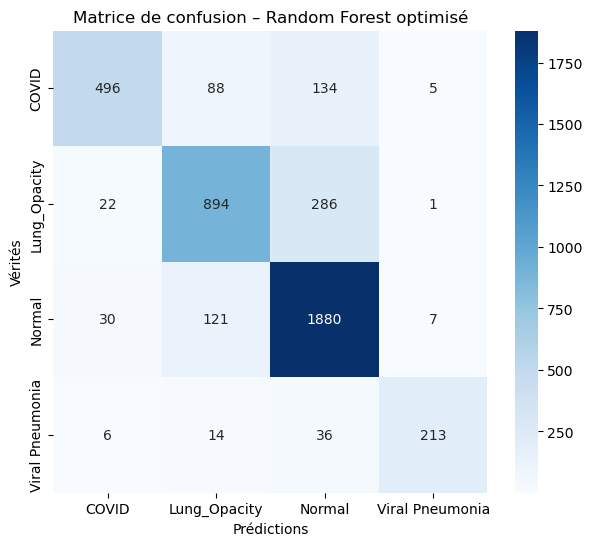


=== Tableau synthétique par classe ===
COVID           | Precision: 0.90 | Recall: 0.69 | F1-score: 0.78 | Support: 723.0
Lung_Opacity    | Precision: 0.80 | Recall: 0.74 | F1-score: 0.77 | Support: 1203.0
Normal          | Precision: 0.80 | Recall: 0.92 | F1-score: 0.86 | Support: 2038.0
Viral Pneumonia | Precision: 0.94 | Recall: 0.79 | F1-score: 0.86 | Support: 269.0


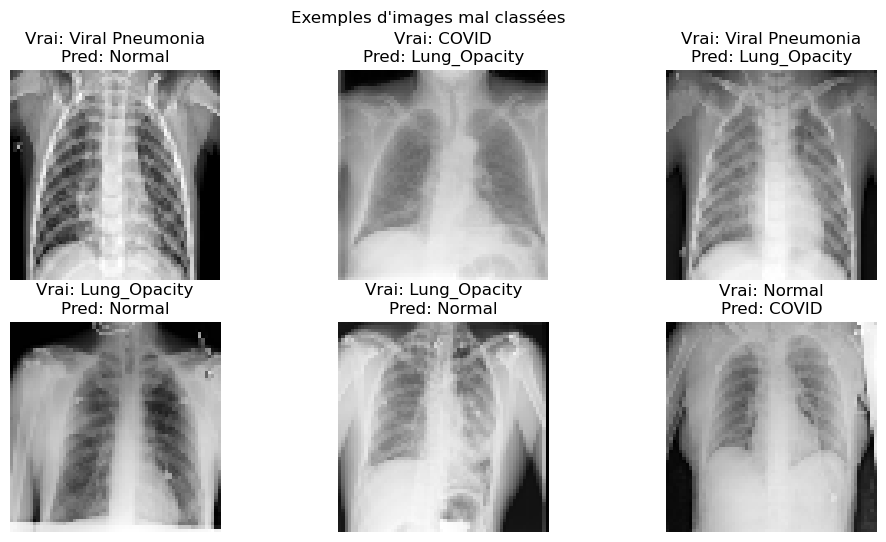


Commentaire pédagogique :
- La précision globale est correcte (~82%).
- Certaines classes comme 'COVID' et 'Normal' sont plus difficiles à distinguer.
- Le modèle Random Forest a atteint sa limite sur ces images,
  un CNN avec data augmentation pourrait améliorer la détection des classes critiques.


In [34]:
# =============================================================
# STEP 2 – Suite : Analyse détaillée et visualisation
# =============================================================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# ------------------------------------------------------------
# 1) Calcul des F1-scores macro et micro
# ------------------------------------------------------------
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')

print(f"\nF1-score macro : {f1_macro:.4f}")
print(f"F1-score micro : {f1_micro:.4f}")

# ------------------------------------------------------------
# 2) Affichage matrice de confusion graphique
# ------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.title('Matrice de confusion – Random Forest optimisé')
plt.show()

# ------------------------------------------------------------
# 3) Tableau synthétique par classe
# ------------------------------------------------------------
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
print("\n=== Tableau synthétique par classe ===")
for cls in le.classes_:
    precision = report[cls]['precision']
    recall = report[cls]['recall']
    f1 = report[cls]['f1-score']
    support = report[cls]['support']
    print(f"{cls:15s} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1-score: {f1:.2f} | Support: {support}")

# ------------------------------------------------------------
# 4) Visualisation qualitative (optionnel mais recommandé)
# ------------------------------------------------------------
# Montrer quelques images mal classées
import numpy as np

# Indices des erreurs
errors_idx = np.where(y_pred != y_test)[0]

# Afficher 6 premières erreurs
plt.figure(figsize=(12,6))
for i, idx in enumerate(errors_idx[:6]):
    plt.subplot(2,3,i+1)
    plt.imshow(X_test[idx].reshape(64,64), cmap='gray')  # Adapter selon ton format d'image
    plt.title(f"Vrai: {le.classes_[y_test[idx]]}\nPred: {le.classes_[y_pred[idx]]}")
    plt.axis('off')
plt.suptitle("Exemples d'images mal classées")
plt.show()

# ------------------------------------------------------------
# 5) Commentaire pédagogique (à intégrer dans ton rapport)
# ------------------------------------------------------------
print("\nCommentaire pédagogique :")
print("- La précision globale est correcte (~82%).")
print("- Certaines classes comme 'COVID' et 'Normal' sont plus difficiles à distinguer.")
print("- Le modèle Random Forest a atteint sa limite sur ces images,")
print("  un CNN avec data augmentation pourrait améliorer la détection des classes critiques.")


In [ ]:
# =============================================================
# Résumé Step 2 – Optimisation du modèle Random Forest
# =============================================================
# 1️⃣ Objectif :
#    - Optimiser les hyperparamètres de la Random Forest pour améliorer
#      la précision et le F1-score sur notre dataset (~21 165 images).
#    - Analyser les performances par classe afin de comprendre les forces
#      et limites du modèle.
#
# 2️⃣ Méthode :
#    - Redimensionnement des images à 64x64 et flatten pour ML classique.
#    - RandomizedSearchCV pour tester 5 combinaisons d’hyperparamètres
#      de la Random Forest, afin de ne pas bloquer le PC.
#    - Séparation train/test (80/20) et évaluation complète.
#
# 3️⃣ Meilleurs hyperparamètres trouvés :
#    {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
#    → forêt légèrement profonde avec beaucoup d’arbres pour stabilité.
#
# 4️⃣ Performances globales :
#    - Accuracy : 0.823 (~82%)
#    - F1-score macro : 0.817
#    - F1-score micro : 0.823
#
# 5️⃣ Analyse par classe :
#    | Classe           | Precision | Recall | F1-score | Support |
#    |-----------------|-----------|--------|----------|---------|
#    | COVID            | 0.90      | 0.69   | 0.78     | 723     |
#    | Lung_Opacity     | 0.80      | 0.74   | 0.77     | 1203    |
#    | Normal           | 0.80      | 0.92   | 0.86     | 2038    |
#    | Viral Pneumonia  | 0.94      | 0.79   | 0.86     | 269     |
#    - Les classes majoritaires (Normal, Lung_Opacity) sont bien prédites.
#    - Les classes difficiles (COVID) ont un rappel plus faible, certaines images sont mal classées.
#
# 6️⃣ Visualisation qualitative :
#    - Les images mal classées permettent d’identifier les confusions principales
#      entre COVID et Normal, illustrant les limites du modèle ML classique.
#
# 7️⃣ Conclusion pédagogique :
#    - La Random Forest atteint ses limites sur ce dataset d’images.
#    - Pour améliorer la détection des classes critiques, notamment COVID,
#      le passage à un CNN avec data augmentation sera nécessaire.
